In [9]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr" -- povrat

In [15]:
data = pd.read_csv("data.csv")

# Display floats with 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

fighters_data = pd.read_csv("fighters.csv")
categories_data = pd.read_csv("categories.csv")

In [ ]:
#data.head()
fighters_data.head()
categories_data.head()

In [ ]:
data.loc[ (data['B_Name']  == "Alistair Overeem") | (data['R_Name'] == "Alistair Overeem")][["B_Name", "R_Name", "B_Weight", "R_Weight", 'winner']]

In [ ]:
data.tail()

In [ ]:
data.dtypes
data.shape
data.info()

array(['blue', 'red', 'no contest', 'draw'], dtype=object)

In [ ]:
data.fillna(value=0,inplace=True)

In [ ]:
data.describe(include=['object']) 
#deskriptivan statiskita za brojčane varijable
data.describe()

In [8]:
fighters=data["B_Name"].unique()
np.savetxt('fighters.csv', fighters, delimiter=',', fmt='%s', header='Fighters', comments='')
#fighters

In [42]:
# Drop rows with NaN values in column 'A'
data.dropna(subset=['Winner'], inplace=True)
data["winner"].unique()


dropdata=data[(data["winner"] == "red") & (data["winner"] == "blue")]
condition = (dropdata['winner_code'] == 3)
# Create a new value for replacement
new_value = 1

# Update the selected rows with the new value
dropdata.loc[condition, 'winner_code'] = new_value

In [43]:
dropdata = data.drop(['B_Location', 'B_HomeTown', 'B_ID','B_Name', 'R_Location', 'R_HomeTown','R_ID','R_Name','winby','Date'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                        'RPrev':'R__Prev',
                        'B_Age':'B__Age',
                        'B_Height':'B__Height',
                        'B_Weight':'B__Weight',
                        'R_Age':'R__Age',
                        'R_Height':'R__Height',
                        'R_Weight':'R__Weight',
                        'BStreak':'B__Streak',
                        'RStreak': 'R__Streak'},inplace=True)

In [44]:
#pretvaranje object type columns  u kategorijske tip kolumni    
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns+"_code"] = dropdata[cat_columns].apply(lambda x: x.cat.codes)

In [45]:
objecttypes = list(dropdata.select_dtypes(include=['float64']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('float32')
#dropdata = dropdata.astype(np.float32)

In [ ]:
dropdata.info()
dropdata = dropdata.drop(dropdata.columns[-2], axis=1)
#dropdata.loc[:,"winner_code"]
#dropdata.iloc[:,886]

In [47]:
dropdata=dropdata[(dropdata["winner_code"] != 1) & (dropdata["winner_code"] != 2)]
condition = (dropdata['winner_code'] == 3)
# Create a new value for replacement
new_value = 1

# Update the selected rows with the new value
dropdata.loc[condition, 'winner_code'] = new_value

In [48]:
#dropdata = data.drop(cat_columns,axis=1)
dropdata.to_csv('data_edited.csv', index=False)

In [52]:
dropdata.columns[883]

'winner_code'

In [ ]:
#for feature in data.dtypes[data.dtypes == 'object'].index: 
df = {'Name': data['B_Location'].value_counts().head(15).index, 'Count': data['B_Location'].value_counts().head(15).values}
df = pd.DataFrame(df)
sns.countplot(x='winby', data=data) 
plt.show() 

In [ ]:
df = {  'Name': data['B_Location'].value_counts().head(15).index, 
        'Count': data['B_Location'].value_counts().head(15).values}
df = pd.DataFrame(df)
sns.barplot(data=df, y='Name', x='Count')
plt.show() 

In [ ]:
for feature in data.dtypes[data.dtypes == 'object'].index: 
    sns.countplot(y=feature, data=dropdata) 
    plt.show() 

<Axes: xlabel='count', ylabel='winner_code'>

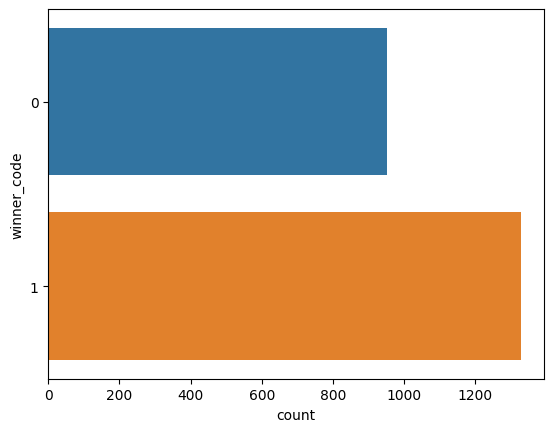

In [34]:
sns.countplot(y='winner_code', data=dropdata) 
plt.show() 


<Axes: xlabel='count', ylabel='R__Weight'>

<Axes: xlabel='count', ylabel='B__Weight'>

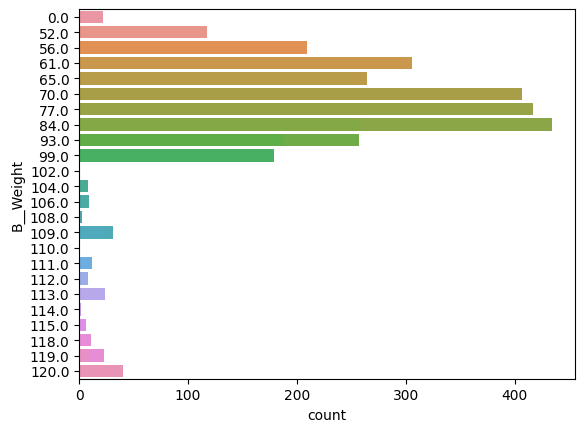

In [13]:
#for feature in data.dtypes[data.dtypes == 'object'].index: 
sns.countplot(y='R__Weight', data=dropdata) 
sns.countplot(y='B__Weight', data=dropdata) 
plt.show() 

In [ ]:
#Basic Correlation Matrix
corrmat = dropdata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# Subset Correlation Matrix
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
Gradient Boosting Classifier was 
applied with a multinomial deviance loss 
function and a learning rate of 0.01, 
producing the following relative variable 
importances:

In [ ]:
sns.lmplot(x="B__Round3_Strikes_Body Significant Strikes_Attempts", 
            y="B__Round3_Strikes_Body Significant Strikes_Landed", 
            col="winner", hue="winner", data=dropdata, col_wrap=2)